# LDA by user

Each vector is a distinct post. Predictions would be performed on single new posts to determine individual probability of belonging to a cluster. 

Code adapted from 
- General Assembly Lesson by Caroline Schmitt: Intro to Latent Dirichlet Allocation. 
- Tutorial from Machine Learning Plus by Selva Prabhakaran https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import LatentDirichletAllocation 
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(42)

## Import preprocessed data

In [2]:
df = pd.read_csv('data/posts_by_users_sample.csv')

In [3]:
df.sample(10, random_state=42)

,username,body
235574,Sharaldoll3,It s on Twitter too
293112,emoji911,Now this is an interesting coincident NY and N...
235546,Shanwid34,I just joined Parler! Looking forward to meeti...
148267,LadyJarhead,"UNHINGED NUTJOB. Way to go, MI. Hey crazy lady..."
153011,Lgrey526364838852,The Pandemic is a Perfect Excuse to Impose Gre...
131313,Jpropst0731,Have faith. The storm is here and it will get ...
140659,KennethBrooks1911,Don't tread on me. Or anyone else. #donttr...
245084,Stacyl1024,Done...thanks so much for the tip I love it!!
73436,Douglasadamiani,His whole performance was to drop sound bites....
69701,Divadiver808,Paco taco


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313862 entries, 0 to 313861
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   username  313862 non-null  object
 1   body      313862 non-null  object
dtypes: object(2)
memory usage: 4.8+ MB


## Train test split

In [5]:
X = df['body']

In [6]:
X_train, X_test = train_test_split(X, test_size=0.1, random_state=42)

In [7]:
X_train.shape

(282475,)

## Count Vectorize

In [22]:
default_words = list(CountVectorizer(stop_words='english').get_stop_words())
my_additions = ['ve', 're', 'll', 'just', 'like', 'don']
custom_stopwords = default_words + my_additions 

In [23]:
cv = CountVectorizer(min_df = 5, 
                     max_df = .5,
                     stop_words = custom_stopwords, 
                     ngram_range = (1, 1), 
                )
cv.fit(X_train)

cv_train = cv.transform(X_train)
cv_test = cv.transform(X_test)
cv_df = pd.DataFrame(cv_train.todense(), columns=cv.get_feature_names_out())
cv_df.head(2)

,00,000,0000,0001,000s,001,002,007,00am,00pm,...,или,ми,на,не,само,се,то,что,ја,је
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
cv

CountVectorizer(max_df=0.5, min_df=5,
                stop_words=['whereafter', 'be', 'now', 'hereupon', 'toward',
                            'should', 'hundred', 'from', 'describe', 'detail',
                            'after', 'much', 'interest', 'why', 'twenty',
                            'this', 'made', 'however', 'more', 'who', 'into',
                            'show', 'his', 'down', 'amongst', 'at', 'most',
                            'cannot', 'elsewhere', 'us', ...])

cv = CountVectorizer(min_df = 5, 
                     max_df = .5,
                     stop_words = custom_stopwords, 
                     ngram_range = (1, 1), 
                )
                
                
full dataset size = 2 rows × 116534 columns

10% dataset 2 rows × 188772 columns

In [10]:
cv_df.columns[1000:1050]

Index(['1974', '1975', '1976', '1977', '1978', '1979', '1980', '1980s', '1981',
       '1982', '1983', '1984', '1984 george', '1985', '1986', '1987', '1988',
       '1989', '199', '1990', '1990s', '1991', '1992', '1993', '1994',
       '1994 crime', '1995', '1996', '1997', '1998', '1999', '19th',
       '19th amendment', '19th century', '1a', '1a 2a', '1a rights', '1am',
       '1b', '1b visa', '1h', '1k', '1m', '1million', '1pm', '1s', '1st',
       '1st 2nd', '1st amendment', '1st ammendment'],
      dtype='object')

## Fit LDA model

In [59]:
lda = LatentDirichletAllocation(n_components=5, 
                                random_state=42
                               )
lda.fit(cv_train)

LatentDirichletAllocation(n_components=5, random_state=42)

In [60]:
len(lda.components_)

5

In [61]:
for each in lda.components_:
    print(len(each))

38150
38150
38150
38150
38150


In [62]:
features = cv.get_feature_names_out()

In [63]:
def display_topics(model, feature_names, num_words):
    for ix, topic in enumerate(model.components_):
        print(f'Topic {ix}:')
        words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
        print('\n'.join(words))
        print()


display_topics(lda, features, 15)

Topic 0:
parler
looking
forward
joined
meeting
twitter
follow
welcome
facebook
thanks
amen
glad
account
fb
post

Topic 1:
trump2020
que
maga
com
wwg1wga
não
god
stopthesteal
da
jesus
echo
se
em
para
lord

Topic 2:
people
covid
world
think
time
new
know
good
right
want
government
make
media
day
way

Topic 3:
people
know
trump
god
good
time
right
need
love
think
thank
going
country
president
let

Topic 4:
trump
biden
election
president
fraud
vote
state
democrats
people
news
states
america
votes
party
need



In [ ]:
def plot_top_words(model, width, height, figsize, feature_names, n_top_words, title):
    fig, axes = plt.subplots(width, height, figsize=figsize, sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelbottom=True, labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

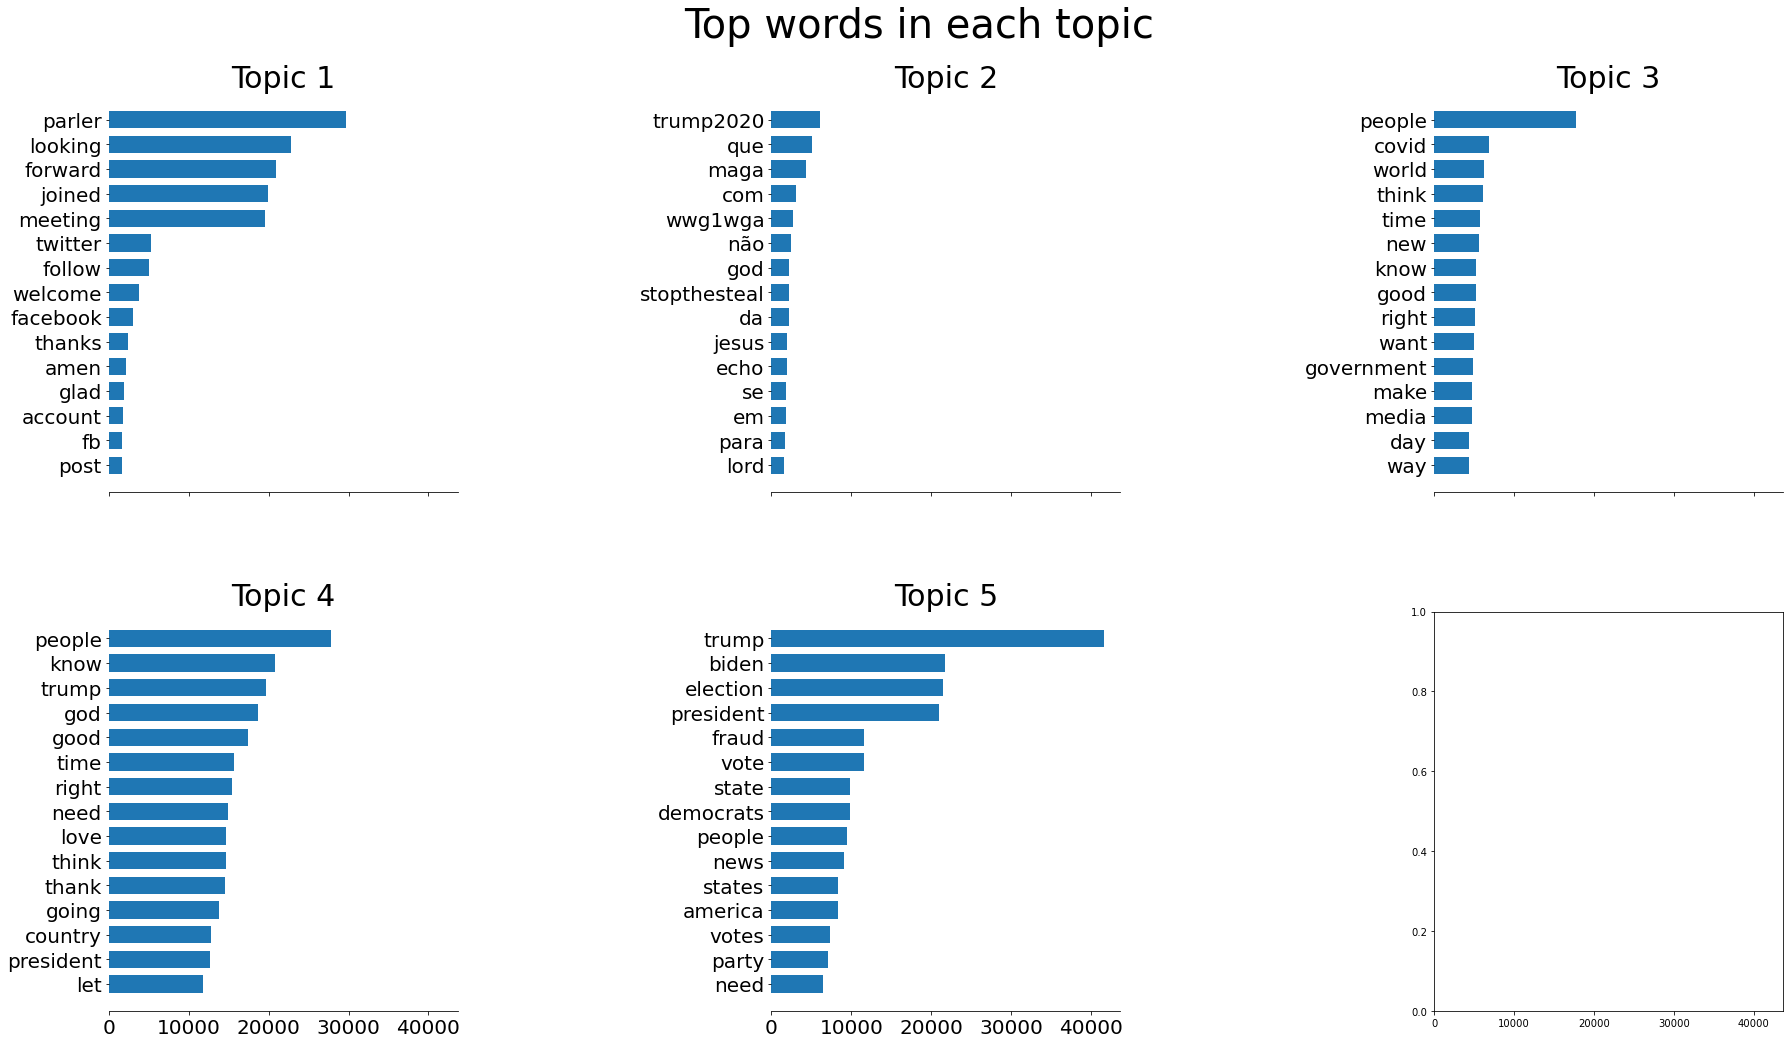

In [65]:
plot_top_words(lda, 2, 3, (30, 15), features, 15, 'Top words in each topic')

In [66]:
lda_8 = LatentDirichletAllocation(n_components=8, 
                                random_state=42
                               )
lda_8.fit(cv_train)

LatentDirichletAllocation(n_components=8, random_state=42)

In [67]:
len(lda_8.components_)

8

In [68]:
display_topics(lda_8, features, 15)

Topic 0:
people
government
country
need
time
want
media
left
america
american
democrats
right
party
know
think

Topic 1:
trump2020
maga
trump
echo
wwg1wga
stopthesteal
follow
amen
usa
jesus
freedom
patriots
kag
parler
qanon

Topic 2:
covid
people
virus
mask
new
vaccine
china
masks
yes
year
think
world
work
going
19

Topic 3:
know
people
shit
trump
biden
think
going
right
did
ass
fuck
good
say
time
lol

Topic 4:
trump
election
biden
president
fraud
vote
state
votes
democrats
states
joe
voting
court
news
people

Topic 5:
news
twitter
parler
good
fox
love
post
thanks
follow
right
facebook
great
welcome
watch
lol

Topic 6:
looking
parler
forward
joined
meeting
que
não
da
se
para
com
em
um
la
os

Topic 7:
god
trump
people
president
thank
country
love
america
bless
time
need
know
let
yes
great



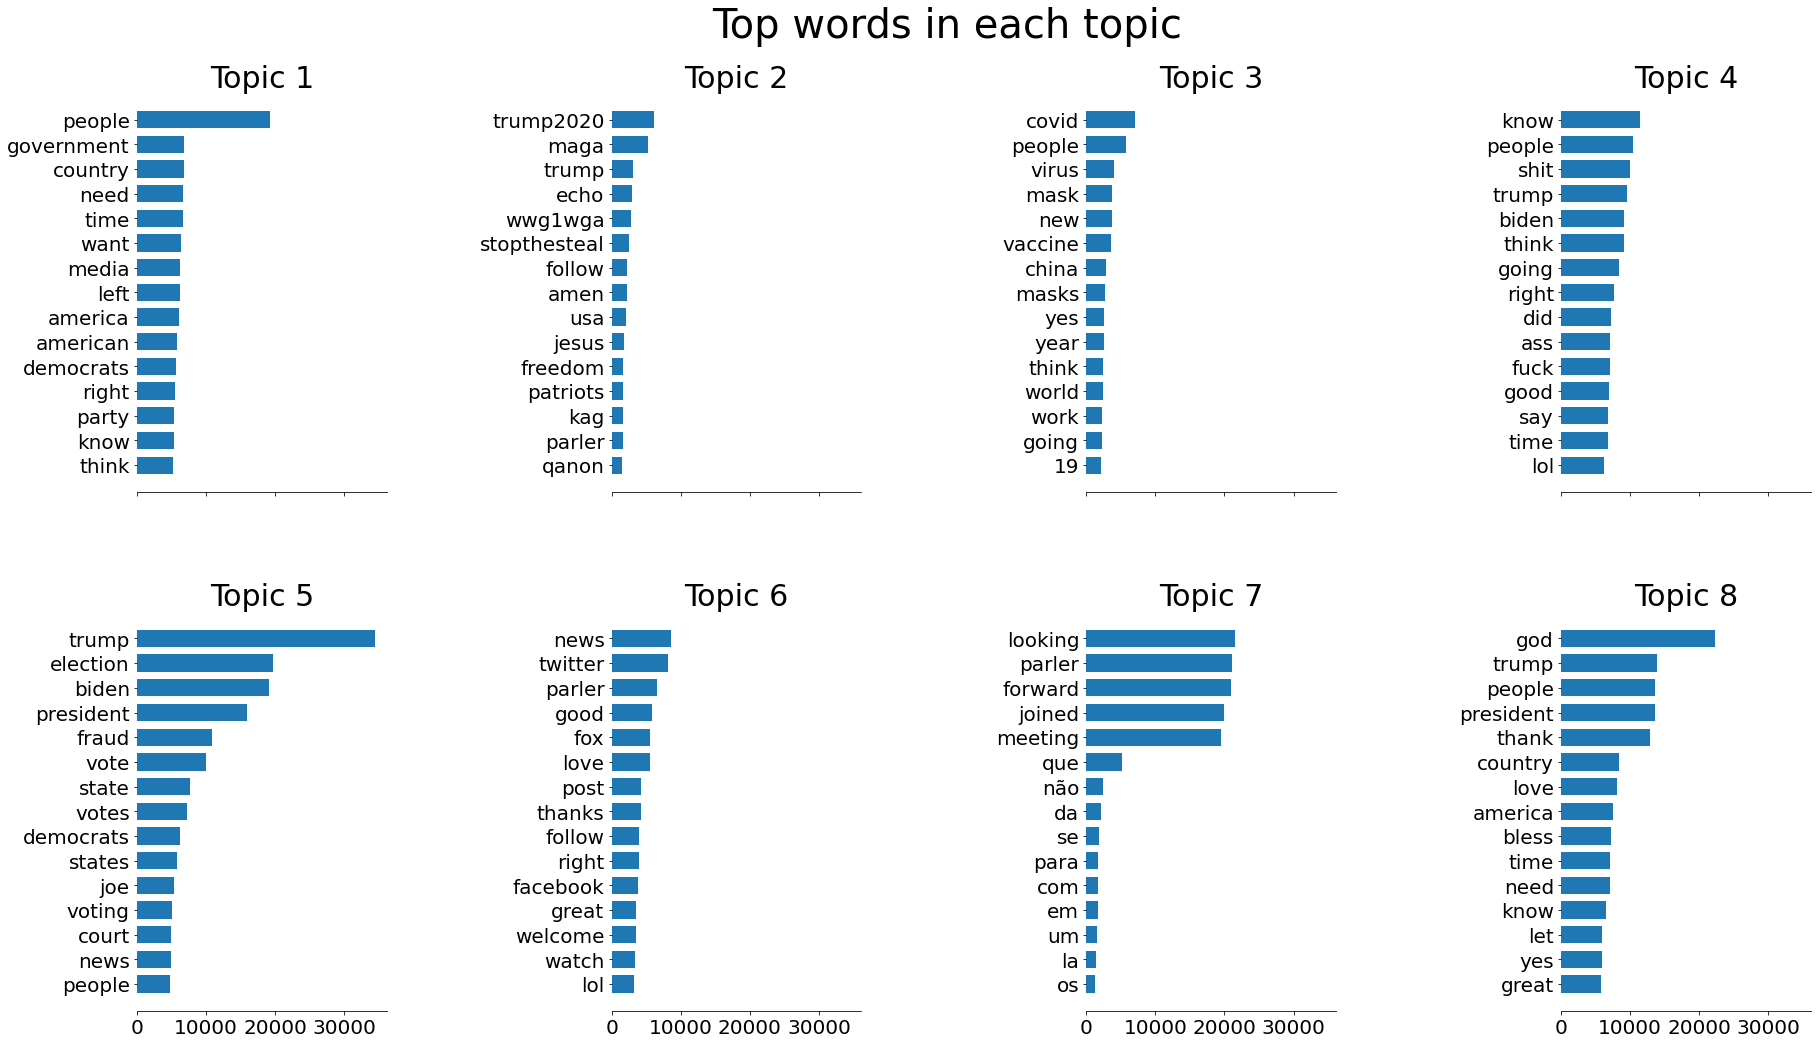

In [71]:
plot_top_words(lda_8, 2, 4, (30, 15), features, 15, 'Top words in each topic')

In [70]:
lda_14 = LatentDirichletAllocation(n_components=14, 
                                random_state=42
                               )
lda_14.fit(cv_train)

KeyboardInterrupt: 

In [ ]:
len(lda_14.components_)

In [ ]:
# unigrams only 
display_topics(lda_14, features, 15)

In [ ]:
plot_top_words(lda_14, 4, 4, (30, 30), features, 15, 'Top words in each topic')

In [ ]:
lda_25 = LatentDirichletAllocation(n_components=25, 
                                random_state=42
                               )
lda_25.fit(cv_train)

In [ ]:
len(lda_25.components_)

In [ ]:
display_topics(lda_25, features, 15)

In [ ]:
plot_top_words(lda_25, 5, 5, (30, 37), features, 15, 'Top words in each topic')

## Examine words in topics